In [1]:
%run tools.ipynb

In [2]:
# ozone metrics
fname = '../data/ctr_ozone_metrics.nc'
ds = xr.open_dataset(fname)

crop_types = ds['crop'].attrs['comment']
dr_m7 = ds['m7']
dr_m12 = ds['m12'] # dr_m12[1,:,:] empty
dr_aot40 = ds['aot40'] # dr_aot40[1,:,:] empty

ry_m = dr_m7.copy()
ry_m[:,:,:] = np.nan
ry_aot40 = ry_m.copy()
#crop_types

In [3]:
# Wheat
# indices: 
# sprint Wheat: RY = 1 − 0.0163AOT40
ry_aot40[4,:,:] = 1 - 0.0163 * dr_aot40[4,:,:]
# winter wheat: RY = 1 − 0.0228AOT40
ry_aot40[5,:,:] = 1 - 0.0228 * dr_aot40[5,:,:]
# Sprint wheat: RY = exp[−(M7/186)3.2]/exp[−(25/186)3.2] (for spring variety only)
ry_m[4,:,:] = np.exp(-1*(dr_m7[4,:,:]/186)**3.2) / np.exp(-1*(25/186)**3.2)
# Winter wheat: RY = exp[−(M7/137)2.34]/exp[−(25/137)2.34] (for winter variety only)
ry_m[5,:,:] = np.exp(-1*(dr_m7[5,:,:]/137)**2.34) / np.exp(-1*(25/137)**2.34)

# Rice
# 1 − 0.00415AOT40
ry_aot40[2:4,:,:] = 1- 0.00415 * dr_aot40[2:4,:,:]
# China: 1 − 0.00949AOT40 (for China only)
# RY = exp[−(M7/202)2.47]/exp[−(25/202)2.47]
ry_m[2:4,:,:] = np.exp(-1*(dr_m7[2:4,:,:]/202)**2.47) / np.exp(-1*(25/202)**2.47)

# Maize
# RY = 1 − 0.00356AOT40
ry_aot40[:2,:,:] = 1 - 0.00356 * dr_aot40[:2,:,:]
# RY = exp[−(M12/124)2.83]/exp[−(20/124)2.83]
ry_m[:2,:,:] = np.exp(-1*(dr_m12[:2,:,:]/124)**2.83) / np.exp(-1*(20/124)**2.83)

# Soybean
# RY = 1 − 0.0113AOT40
ry_aot40[-1,:,:] = 1 - 0.0113 * dr_aot40[-1,:,:]
# RY = exp[−(M12/107)1.58]/exp[−(20/107)1.58]
ry_m[-1,:,:] = np.exp(-1*(dr_m12[-1,:,:]/107)**1.58) / np.exp(-1*(20/107)**1.58)

# Values for China are applied to a longitude range of 92.5°E-147.5°E and 
# a latitude range of 8.53°S-52.11°N.


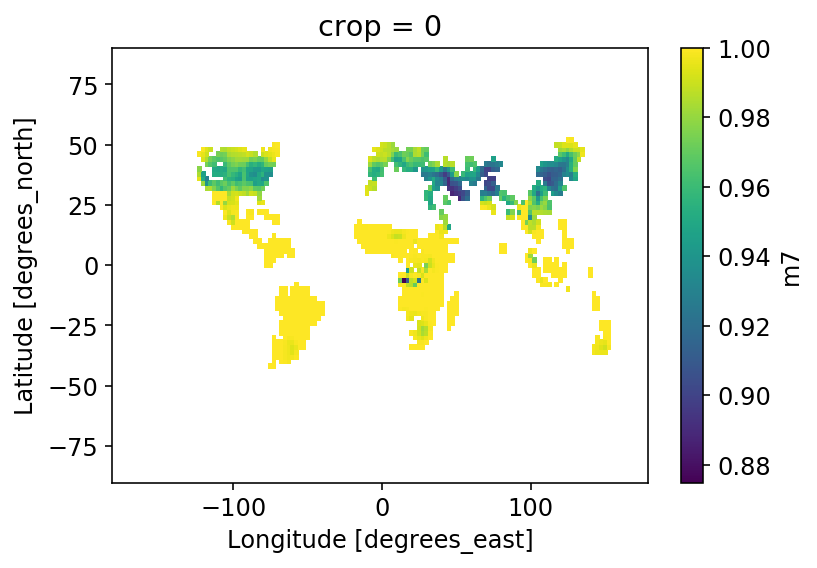

In [4]:
ry_aot40[0,:,:].plot()

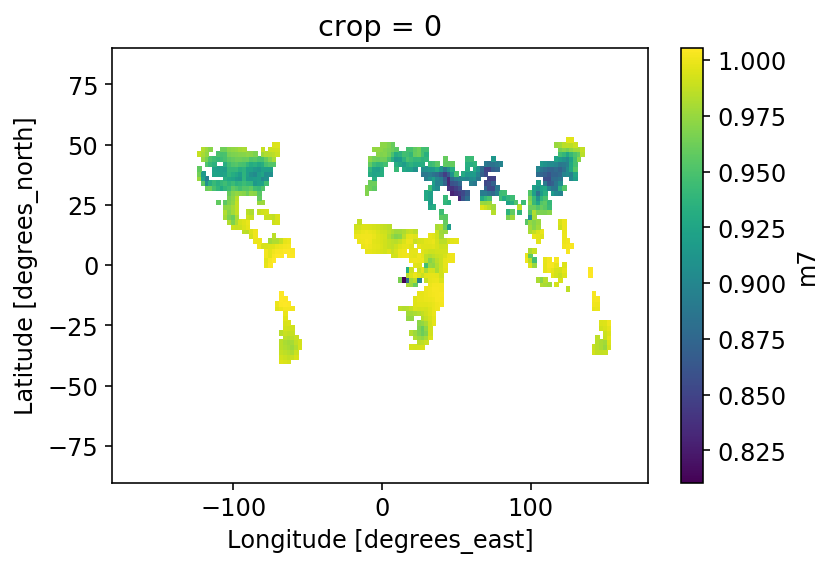

In [5]:
ry_m[0,:,:].plot()

In [6]:
# output
ds = ry_m.to_dataset(name = 'm7_m12')
ds['aot40'] = ry_aot40
ds.to_netcdf('../data/crop/ctr_relative_yield.nc')
